In [13]:
#!import "setup.ipynb"

using PdfLexer.Writing;


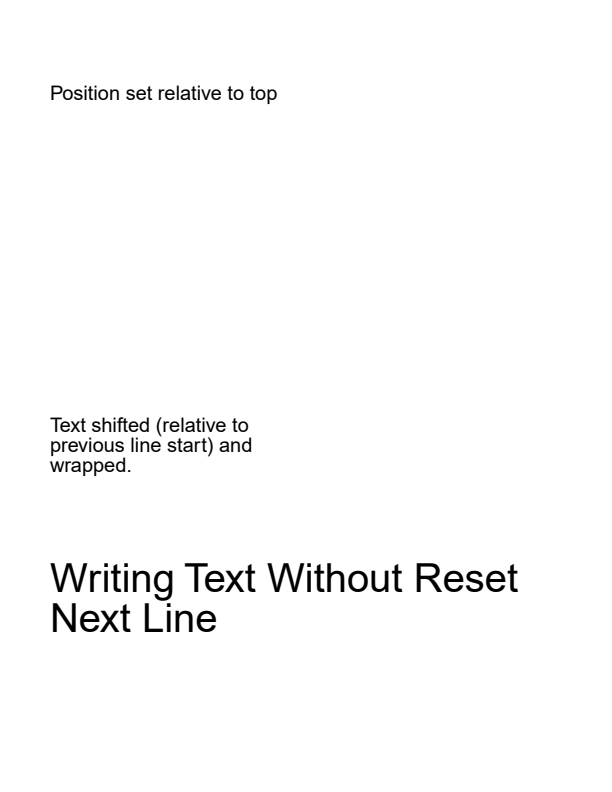

In [14]:
{
    using var doc = PdfDocument.Create();
    var pg = doc.AddPage();
    {
        using var writer = pg.GetWriter();
        writer
            .Font(Base14.Helvetica, 40)
            .TextMove(50, 200)
            .Text("Writing Text ").Text("Without Reset")
            .NewLine()
            .Text("Next Line")
            .Font(Base14.Helvetica, 20)
            .TextMove(0, 200)
            .TextWrap("Text shifted (relative to previous line start) and wrapped.", 225)
            .TextMoveTo(PdfPoint.Create(50.0, -100.0).NormalizeToTopLeft(pg))
            .Text("Position set relative to top");
    }

    display(pg);
}